<a href="https://colab.research.google.com/github/Shreyy2002/EDA/blob/main/Medical_Appointments_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [43]:
# Reading the dataset

df = pd.read_csv('Healthcare.csv')

In [6]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,5.785425e+12,5648654,M,2016-05-02T16:16:11Z,2016-05-04T00:00:00Z,79.0,SANTA CECÍLIA,0.0,1.0,0.0,0.0,0.0,0.0,No
21511,8.844899e+13,5648656,F,2016-05-02T16:16:23Z,2016-05-04T00:00:00Z,69.0,PARQUE MOSCOSO,0.0,1.0,0.0,0.0,0.0,0.0,No
21512,9.512645e+12,5676928,F,2016-05-09T16:53:50Z,2016-05-11T00:00:00Z,41.0,ILHA DO PRÍNCIPE,0.0,0.0,0.0,0.0,0.0,0.0,No
21513,6.897679e+12,5676929,M,2016-05-09T16:54:04Z,2016-05-11T00:00:00Z,72.0,CONSOLAÇÃO,0.0,1.0,0.0,1.0,0.0,0.0,No


In [7]:
df.shape

(21515, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21515 entries, 0 to 21514
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       21515 non-null  float64
 1   AppointmentID   21515 non-null  int64  
 2   Gender          21515 non-null  object 
 3   ScheduledDay    21515 non-null  object 
 4   AppointmentDay  21514 non-null  object 
 5   Age             21514 non-null  float64
 6   Neighbourhood   21514 non-null  object 
 7   Scholarship     21514 non-null  float64
 8   Hipertension    21514 non-null  float64
 9   Diabetes        21514 non-null  float64
 10  Alcoholism      21514 non-null  float64
 11  Handcap         21514 non-null  float64
 12  SMS_received    21514 non-null  float64
 13  No-show         21514 non-null  object 
dtypes: float64(8), int64(1), object(5)
memory usage: 2.3+ MB


In [9]:
#modifying the date and time into standard form
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [11]:
# 5 is Saturday, 6 is Sunday
# Assigning each weak day a number
df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek

In [12]:
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

In [13]:
df['sch_weekday'].value_counts()


1    4872
4    4498
2    4473
0    3933
3    3737
5       2
Name: sch_weekday, dtype: int64

**Conclusion:** Majority people visit on [Monday, Tuesday and Thursday]

In [14]:
from os import defpath
defpath['app_weekday'].value_counts()

4.0    5828
1.0    4906
2.0    3943
0.0    3865
3.0    2972
Name: app_weekday, dtype: int64

In [15]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [16]:
#changing the name of some cloumns
base_data= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow' })

In [17]:
# dropping some columns which have no significance
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [18]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21514.000000,21515.000000,21514.000000
mean,36.704750,0.088082,0.184577,0.062517,0.047039,0.020359,0.307939,2.000046,2.092591
std,22.264908,0.283421,0.387963,0.242099,0.211728,0.152313,0.461652,1.403044,1.469654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,4.000000


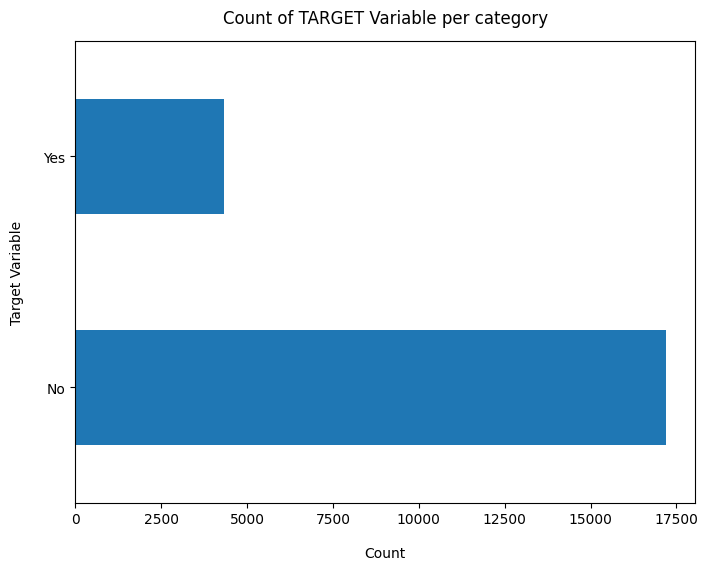

In [19]:
# 'Yes'--> People have visited after taking appointment
# 'No'--> People have not visited after taking appointment
# The code below shows the comparison between the people that visit and that donot visit.
df['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

It seems the data is highly unstable becaue 80% visit and 20% of people don't visit.

In [20]:
# calculating the % of appointments or not
100*df['NoShow'].value_counts()/len(df['NoShow'])

No     79.897746
Yes    20.097606
Name: NoShow, dtype: float64

In [21]:
df['NoShow'].value_counts()

No     17190
Yes     4324
Name: NoShow, dtype: int64

In [ ]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**Missing Data - Initial Intuition**

Here, we don't have any missing data.

**General Thumb Rules:**

 1. For features with less missing values- can use regression to predict the
missing values or fill with the mean of the values present, depending on the feature.

2. For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

3. As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

# **Data Cleaning**
1. Create a copy of base data for manupulation & processing

In [24]:
new_data = df.copy()

In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21515 entries, 0 to 21514
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          21515 non-null  object        
 1   ScheduledDay    21515 non-null  datetime64[ns]
 2   AppointmentDay  21514 non-null  datetime64[ns]
 3   Age             21514 non-null  float64       
 4   Scholarship     21514 non-null  float64       
 5   Hypertension    21514 non-null  float64       
 6   Diabetes        21514 non-null  float64       
 7   Alcoholism      21514 non-null  float64       
 8   Handicap        21514 non-null  float64       
 9   SMSReceived     21514 non-null  float64       
 10  NoShow          21514 non-null  object        
 11  sch_weekday     21515 non-null  int64         
 12  app_weekday     21514 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(1), object(2)
memory usage: 2.1+ MB


As we don't have any null records, there's no data cleaning required. only 1 value missing in each column so we can ignore that for now.

In [26]:
#Get the max tenure
print(df['Age'].max()) #72


98.0


In [27]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

df['Age_group'] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)

In [28]:
df.drop(['Age'], axis=1, inplace=True)


# **Data Exploration**

In [29]:
list(df.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
F    13416
M     8099
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-04-29    1667
2016-05-09     880
2016-05-02     874
2016-05-10     873
2016-05-05     866
              ... 
2016-02-02       1
2015-11-10       1
2016-02-03       1
2016-01-14       1
2016-01-21       1
Name: ScheduledDay, Length: 80, dtype: int64
---------- AppointmentDay ----------
2016-04-29    3235
2016-05-18    1051
2016-05-12    1037
2016-05-31    1010
2016-05-16    1009
2016-05-03    1001
2016-05-19     995
2016-05-17     992
2016-05-02     984
2016-05-24     974
2016-05-04     973
2016-05-11     962
2016-05-25     957
2016-05-30     949
2016-05-05     940
2016-05-10     929
2016-05-20     926
2016-05-09     923
2016-05-13     848
2016-05-06     819
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0.0    19619
1.0     1895
Name: Scholarship, dtype: int64
---------- Hypertension ----------
0.0    17543
1.0     3971
Name: Hypertension, dtype: i

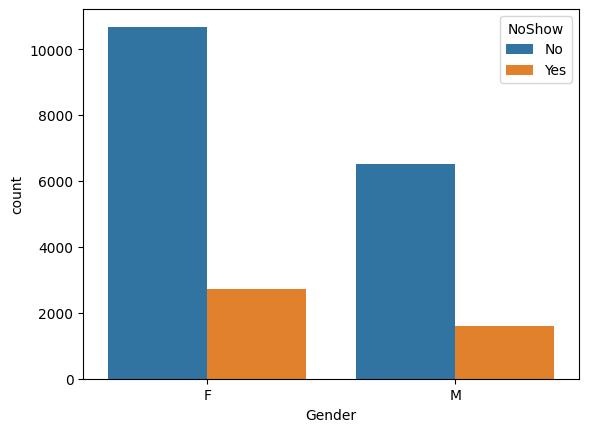

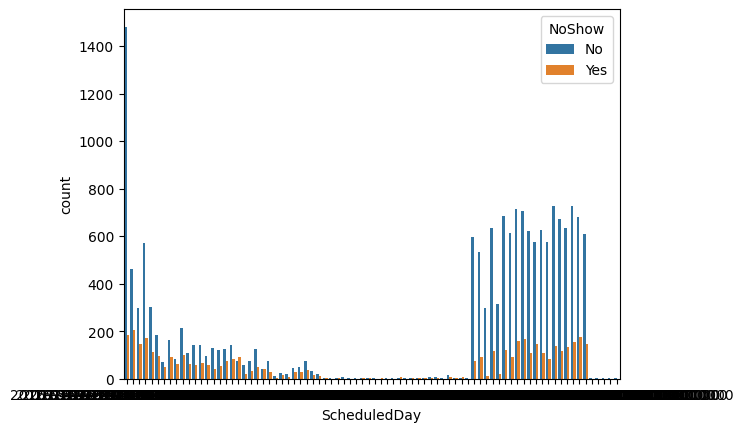

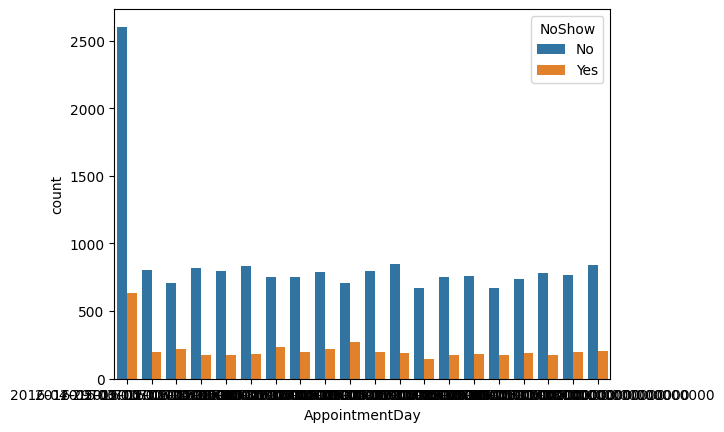

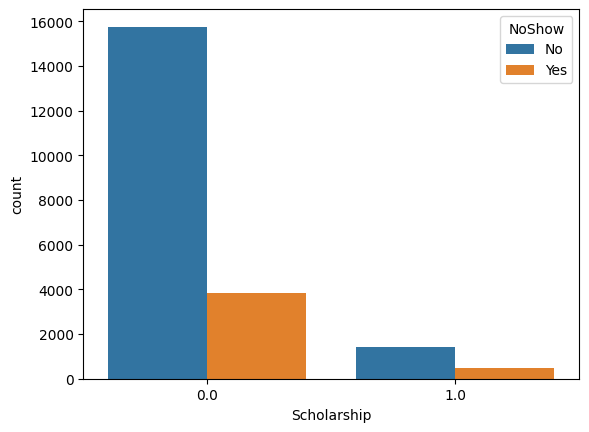

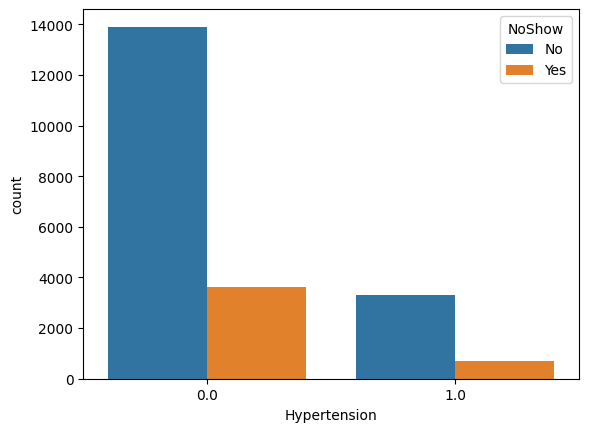

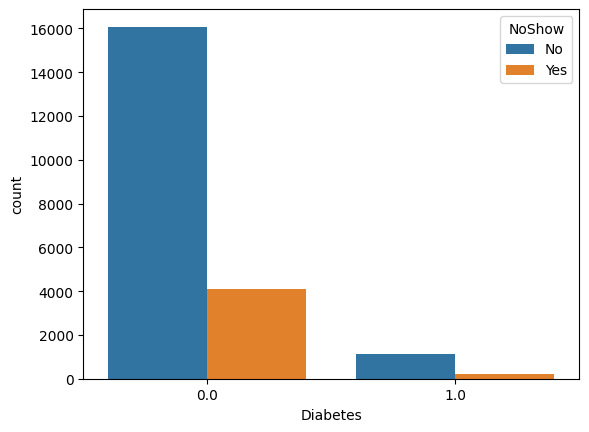

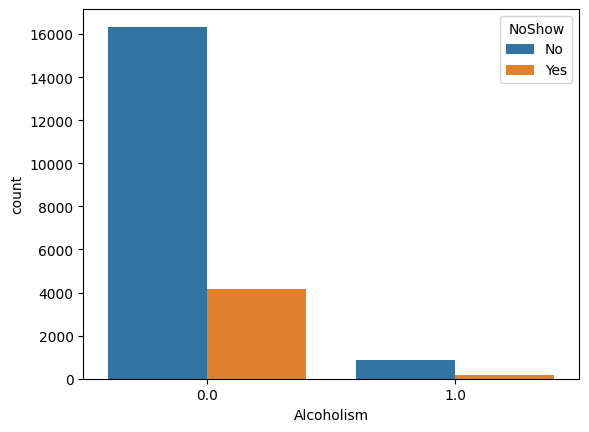

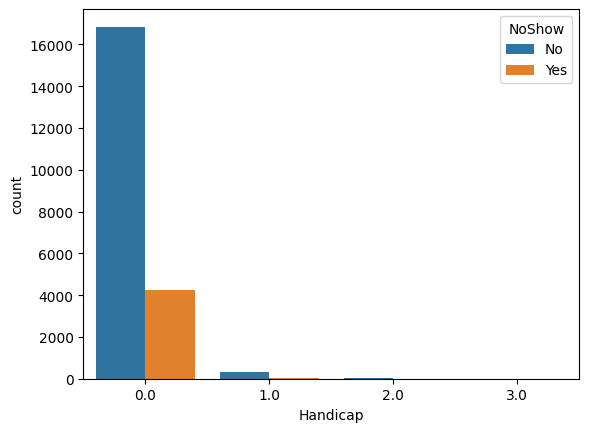

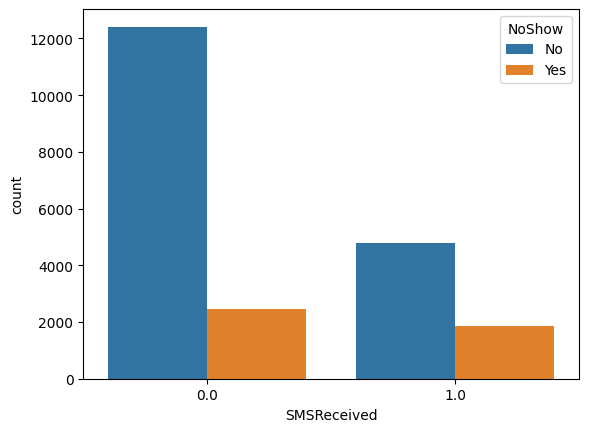

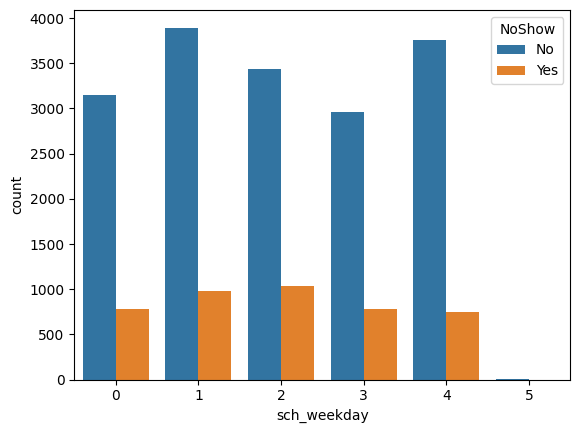

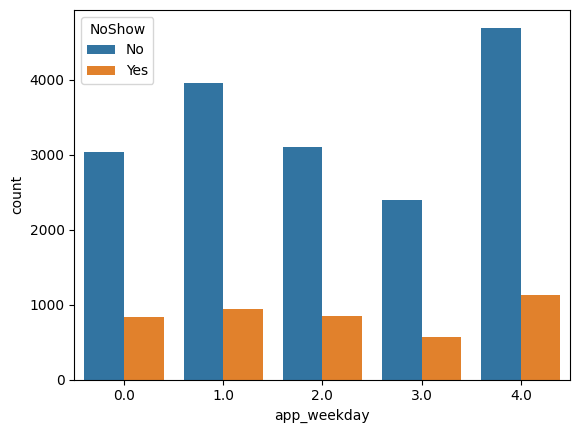

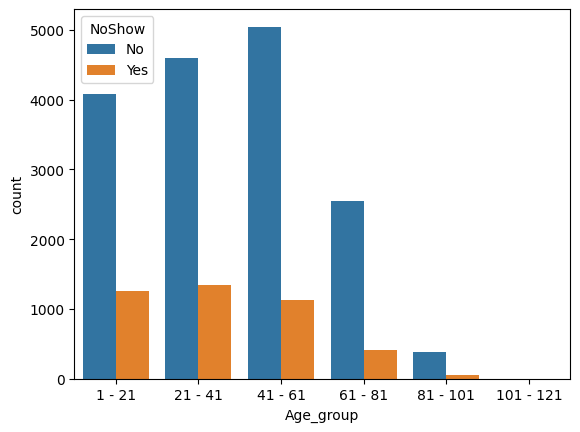

In [30]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(df.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='NoShow')

# the columns which have "date" as  a factor, we have counted the total number of appointments for "ScheduledDay" and "AppoitnmentDay"
# and counted number of 0's and 1's that appeared in each column(Hypertension, Diabtetes....etc.)

In [31]:
df['NoShow'] = np.where(df.NoShow == 'Yes',1,0)

In [32]:
df.NoShow.value_counts()

0    17191
1     4324
Name: NoShow, dtype: int64

In [34]:
# Converted the age into dummies
df_dummies = pd.get_dummies(df)
df_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0.0,1.0,0.0,0.0,0.0,0.0,0,4,4.0,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0,4,4.0,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0,4,4.0,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0.0,0.0,0.0,0.0,0.0,0.0,0,4,4.0,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0.0,1.0,1.0,0.0,0.0,0.0,0,4,4.0,1,0,0,0,1,0,0,0


<ipython-input-35-2af5ffecb2b2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

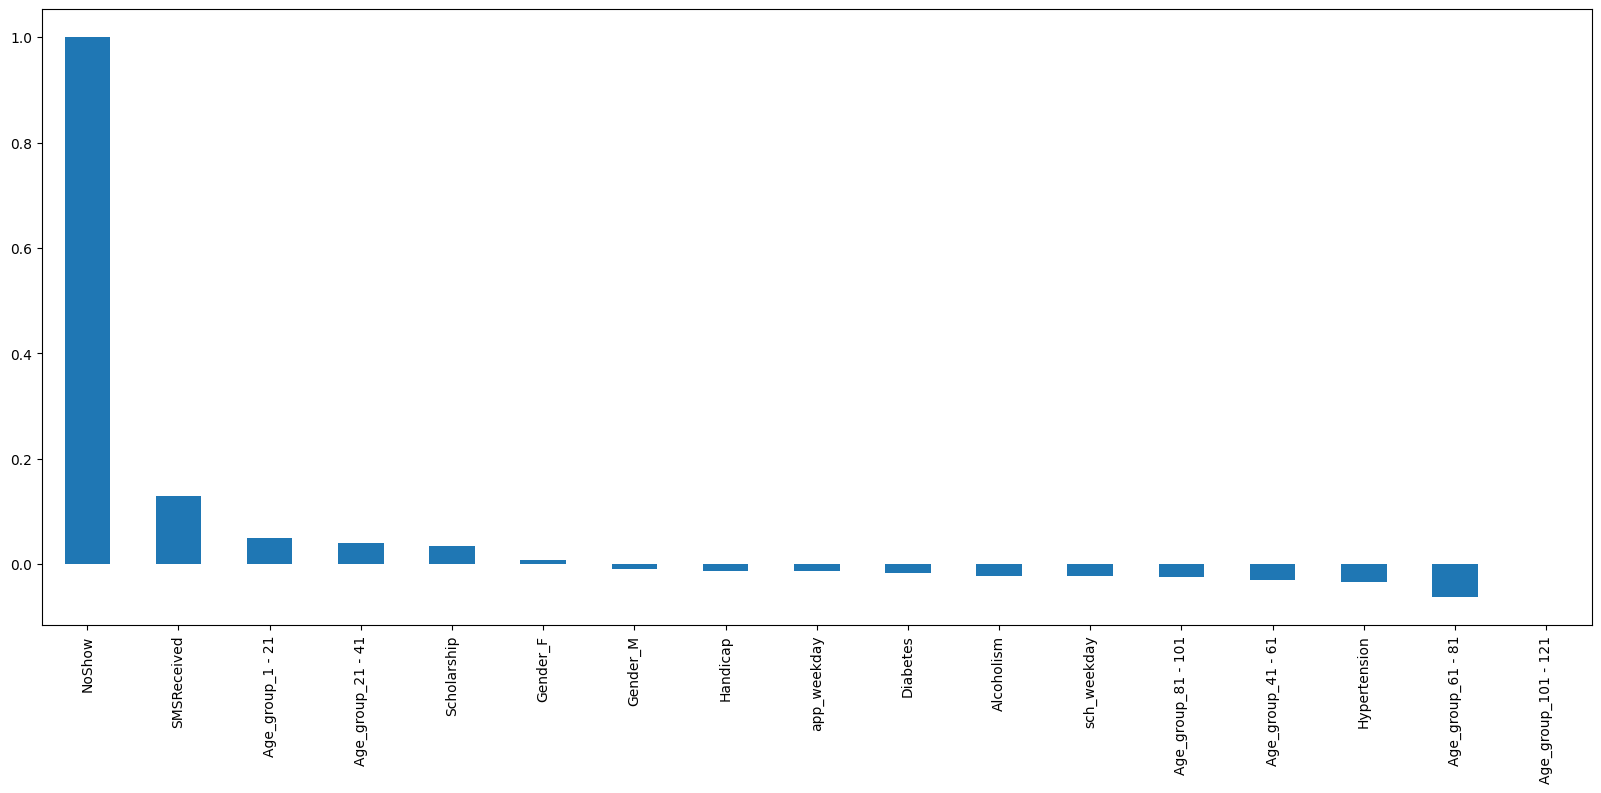

In [35]:
#Tis show the correlateion between metrices.
plt.figure(figsize=(20,8))
df_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<ipython-input-36-008e55dbac3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_data_dummies.corr(), cmap="Paired")


<Axes: >

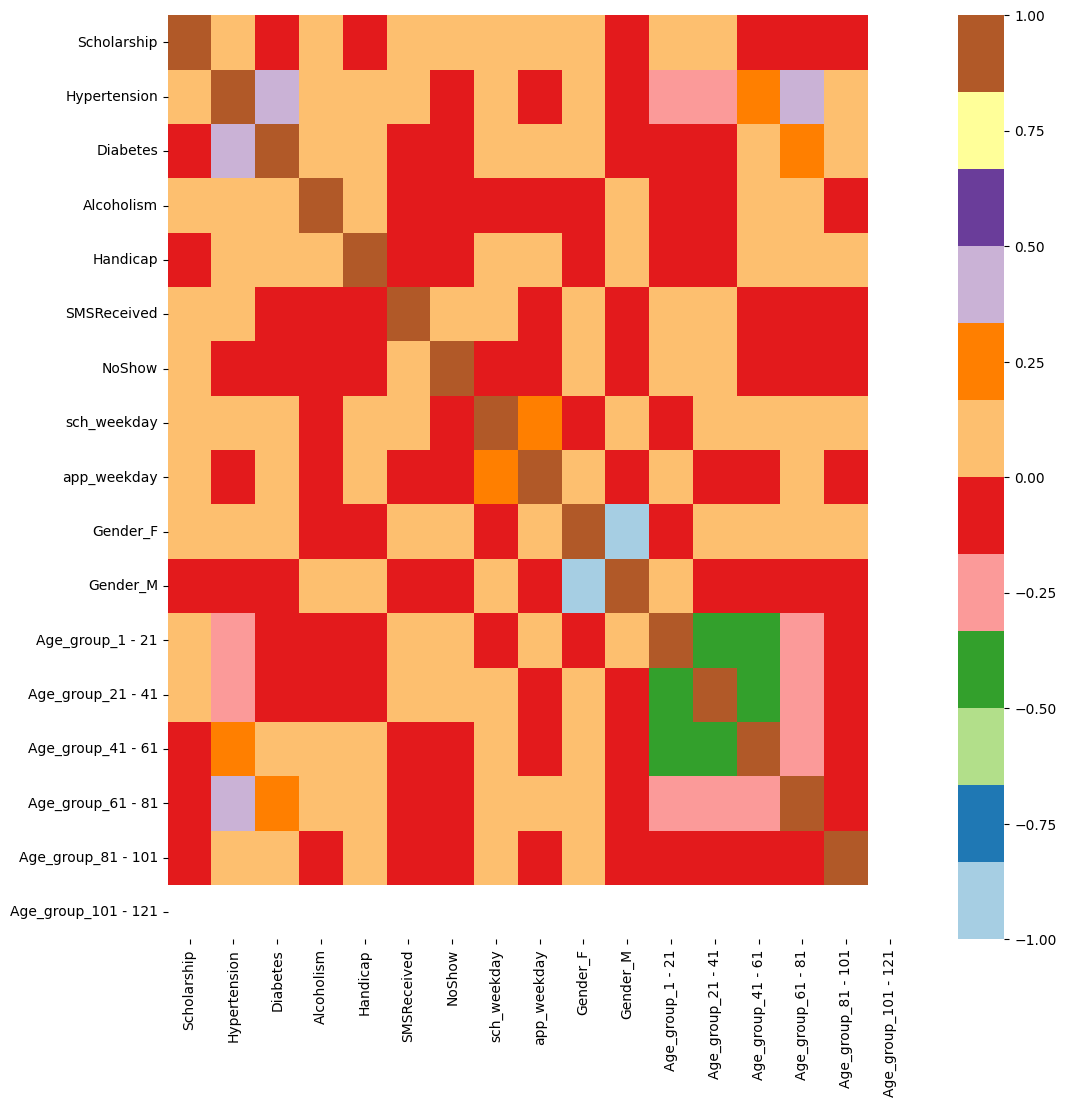

In [36]:
#Heatmap is created for analysis
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

# **Bivariate Analysis**

In [37]:
new_df1_target0=df.loc[df["NoShow"]==0]
new_df1_target1=df.loc[df["NoShow"]==1]

In [38]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

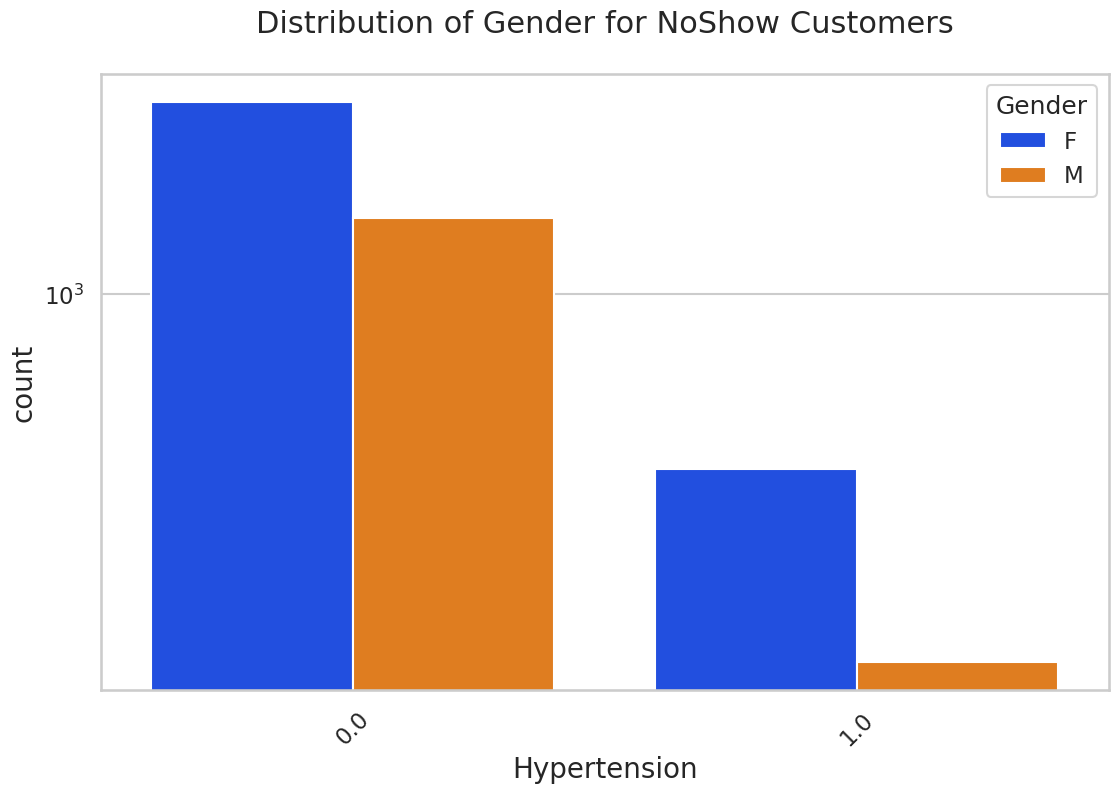

In [39]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

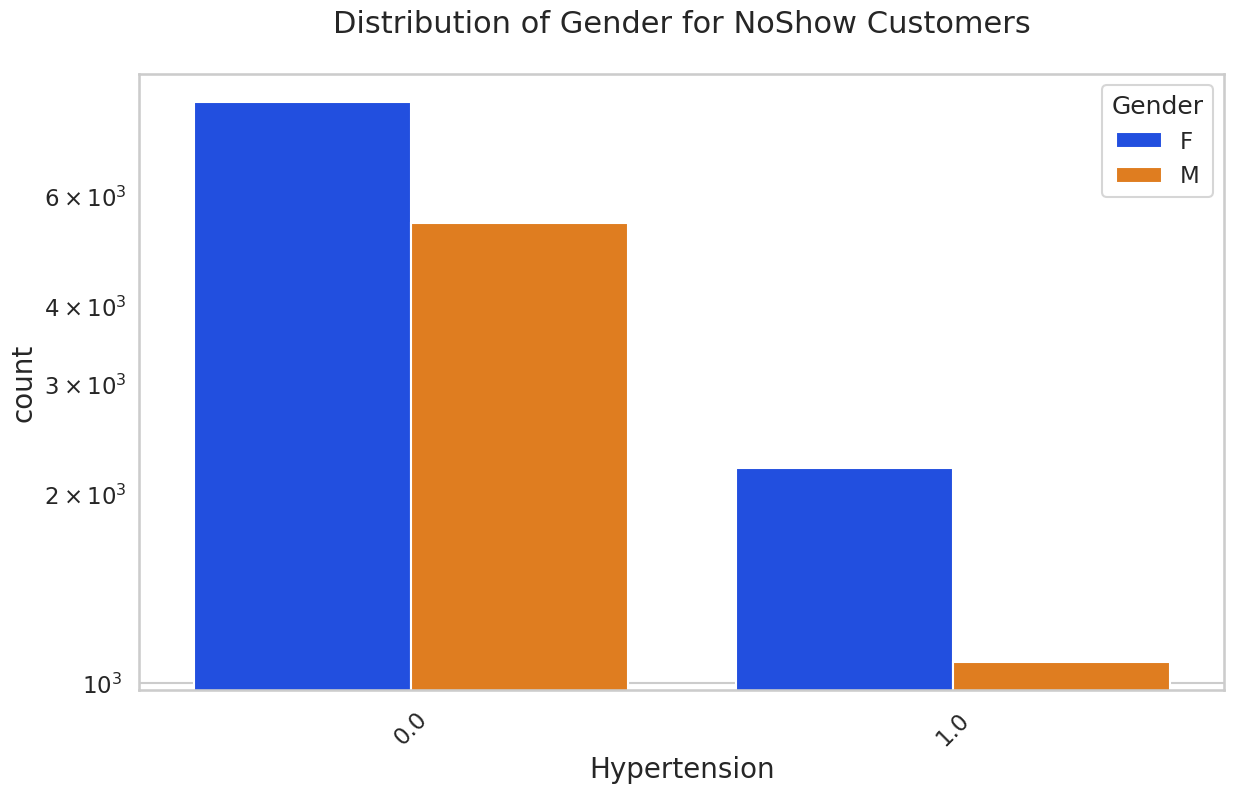

In [40]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

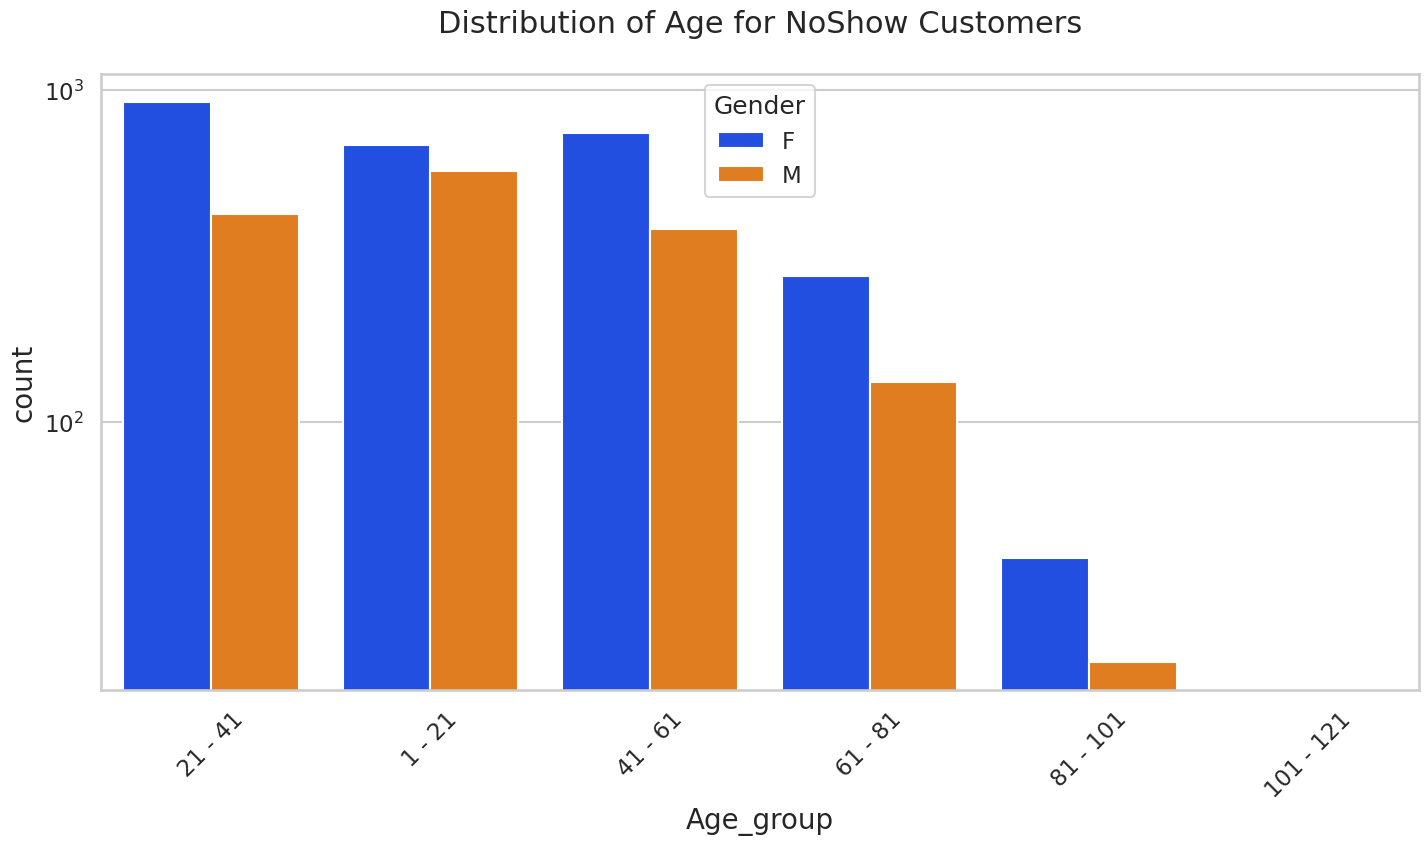

In [41]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

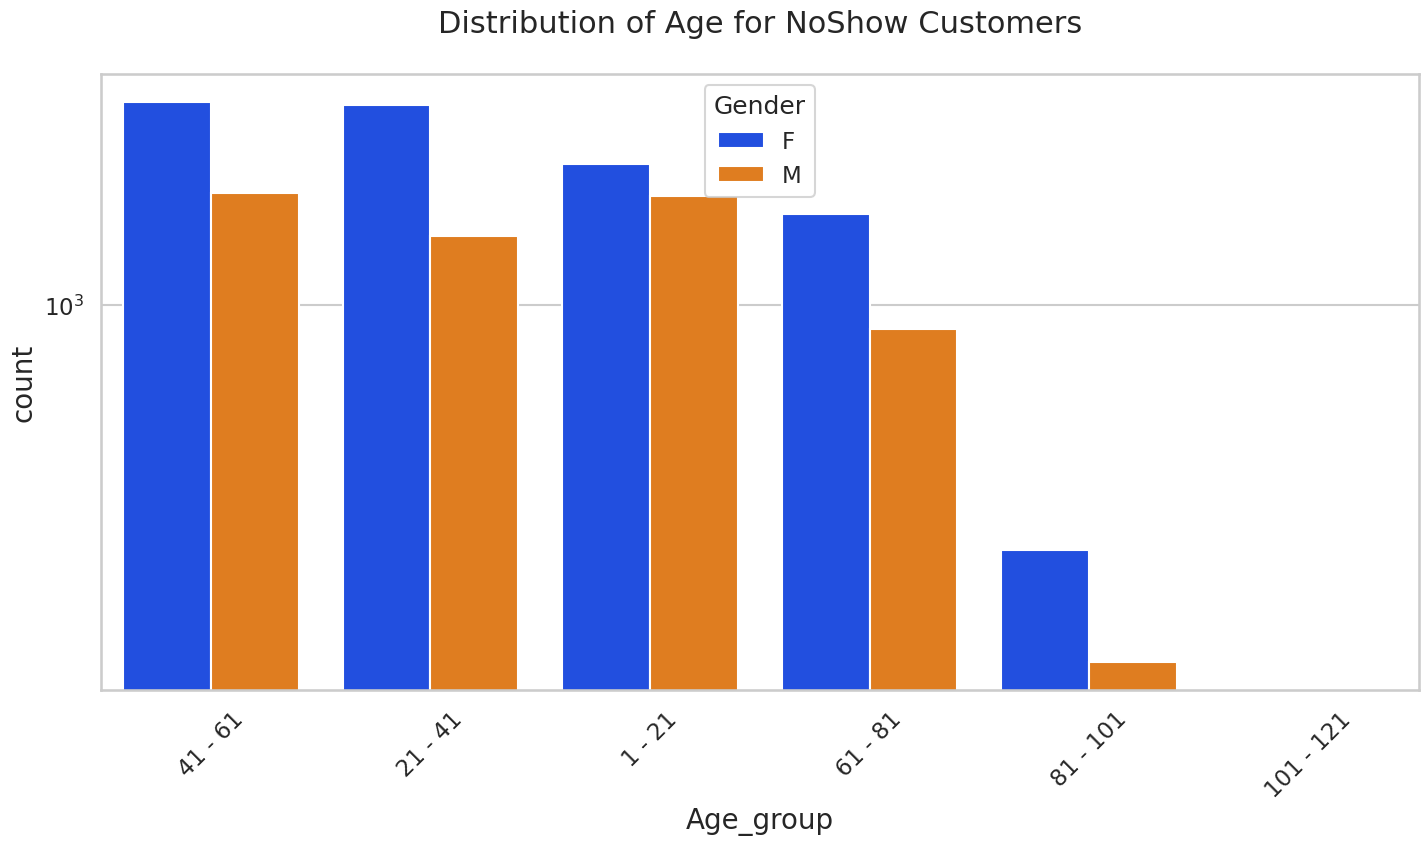

In [42]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

Findings:

1. Female patients have taken more appointments then male patients


2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group


3. Each Neighbourhood have almost 80% show rate


4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.


5. There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.


6. There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.


7. There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.


8. There is no appointments on sunday and on saturday appointments are very less in comparision to other week days